In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


## 1. 데이터셋 설명
- CIFAR-10 dataset은 32 x 32크기의 컬러 이미지로 총 60,000장, 10개의 클래스로 이루어짐
- training set은 50,000장, test set은 10,000장으로 이루어짐
- CIFAR repository (https://www.cs.toronto.edu/~kriz/cifar.html)
- 이미지를 10개의 클래스로 분류하는 문제
- 10 classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

## 2. 라이브러리 임포트

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from keras import datasets, models, layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
from keras.optimizers import Adam

In [3]:
data = tf.keras.datasets.cifar10
# x_train is train images
# y_train is target images for training
(x_train, y_train), (x_test, y_test) = data.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [4]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0
print(type(x_train))
print(type(x_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


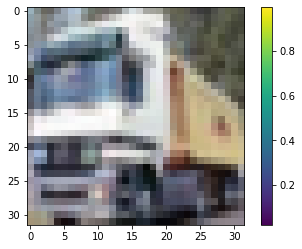

In [5]:
# an example image
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

plt.show()

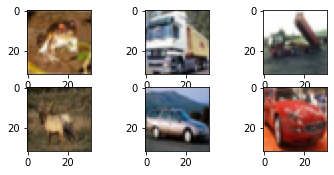

In [6]:
for i in range(6):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
plt.show()

In [7]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 32)        0

In [8]:
optimizer = Adam(lr=0.001)
# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(optimizer = optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
# learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
#                                            patience=3,
#                                            verbose=1,
#                                            fator=0.5,
#                                            min_lr=0.00001)

In [10]:
epochs=20
batch_size=64

history = model.fit(x_train, y_train, epochs=epochs,batch_size=batch_size,
                   validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
782/782 - 5s - loss: 1.4233 - accuracy: 0.4946 - val_loss: 1.5712 - val_accuracy: 0.4706
Epoch 2/20
782/782 - 4s - loss: 1.0582 - accuracy: 0.6228 - val_loss: 1.3539 - val_accuracy: 0.5434
Epoch 3/20
782/782 - 4s - loss: 0.9196 - accuracy: 0.6780 - val_loss: 1.0676 - val_accuracy: 0.6268
Epoch 4/20
782/782 - 4s - loss: 0.8170 - accuracy: 0.7141 - val_loss: 0.9912 - val_accuracy: 0.6557
Epoch 5/20
782/782 - 4s - loss: 0.7422 - accuracy: 0.7420 - val_loss: 0.8847 - val_accuracy: 0.6982
Epoch 6/20
782/782 - 4s - loss: 0.6816 - accuracy: 0.7602 - val_loss: 0.8946 - val_accuracy: 0.6934
Epoch 7/20
782/782 - 4s - loss: 0.6314 - accuracy: 0.7778 - val_loss: 0.8155 - val_accuracy: 0.7164
Epoch 8/20
782/782 - 4s - loss: 0.5895 - accuracy: 0.7923 - val_loss: 0.7820 - val_accuracy: 0.7349
Epoch 9/20
782/782 - 4s - loss: 0.5522 - accuracy: 0.8058 - val_loss: 0.7857 - val_accuracy: 0.7296
Epoch 10/20
782/782 - 4s - loss: 0.5211 - accuracy: 0.8146 - val_loss: 0.8817 - val_accuracy: 0.7102

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


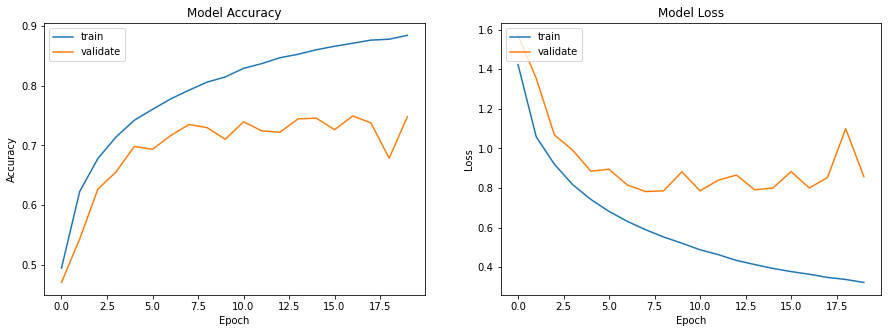

In [14]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [15]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8570 - accuracy: 0.7480
Test loss: 0.8569586873054504
Test accuracy: 0.7480000257492065


In [19]:
# test = pd.read_csv("../input/cifar-10/test.7z")

In [17]:
# predict results
results = model.predict(x_test, y_test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()